1.人口统计分析

- 国家和地区分布：统计用户所在国家和地区的分布，识别主要的开发者集中地。

用户数量最多的前 10 个国家和地区：
country
United States     122
Germany            59
China              34
Canada             24
France             24
United Kingdom     21
Netherlands        18
Australia          15
Switzerland        14
Japan              13
Name: name, dtype: int64


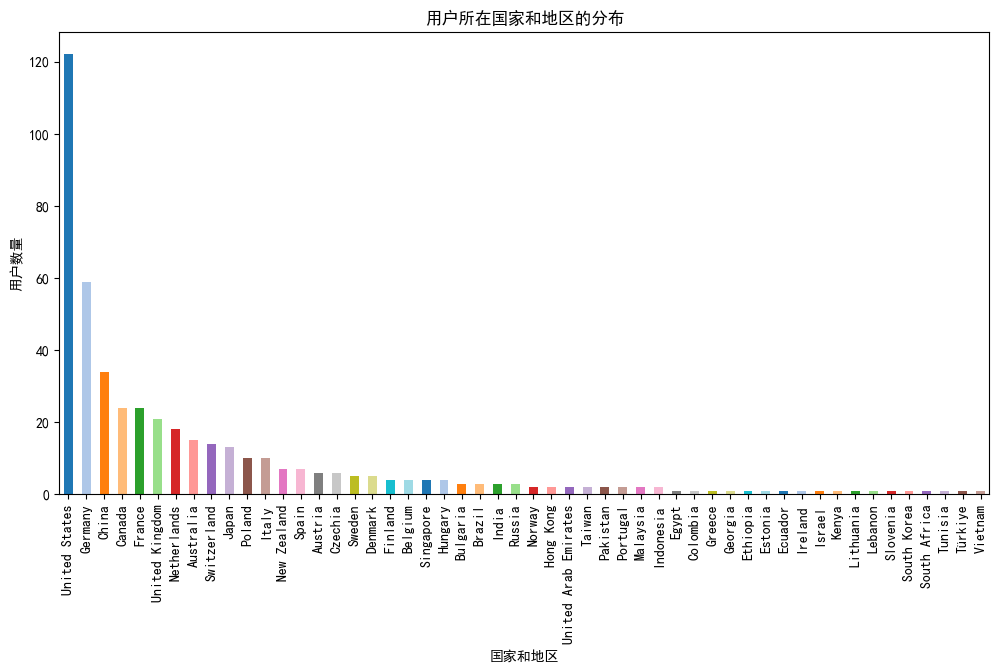

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取 CSV 文件
df = pd.read_csv('users_combined_info_500.csv')

# 根据 name 列和 country 列统计用户所在国家和地区的分布
country_distribution = df.groupby('country')['name'].nunique().sort_values(ascending=False)

# 打印用户数量最多的前 10 个国家和地区
print("用户数量最多的前 10 个国家和地区：")
print(country_distribution.head(10))

colors = plt.cm.tab20.colors

# 绘制国家和地区的分布图
plt.figure(figsize=(12, 6))
country_distribution.plot(kind='bar', color=colors)
plt.title('用户所在国家和地区的分布')
plt.xlabel('国家和地区')
plt.ylabel('用户数量')
plt.show()

- 城市级别分布：分析主要城市的开发者密度，发现技术热点区域。

开发者数量最多的城市：
city
Berlin           14
San Francisco    11
London            8
Amsterdam         8
Paris             8
Seattle           8
New York          6
Beijing           6
Tokyo             5
Zurich            5
Name: name, dtype: int64


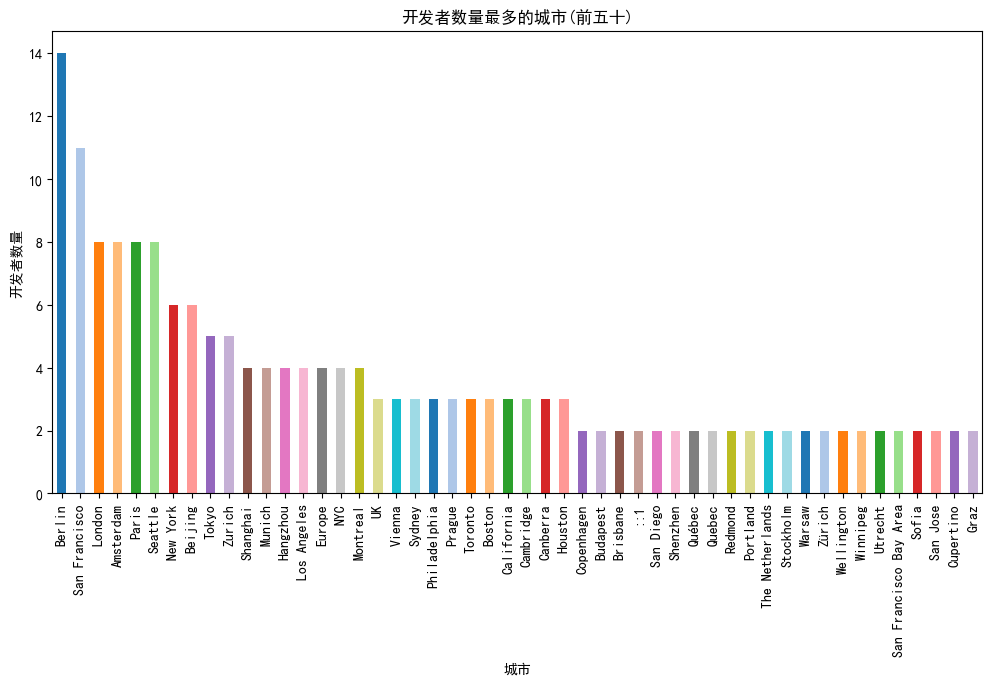

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv('users_combined_info_500.csv')

# 从 country 列提取已知的国家名称列表
known_countries = df['country'].dropna().unique().tolist()

# 定义一个函数来提取城市信息
def extract_city(location):
    if pd.isnull(location):
        return None
    # 使用正则表达式匹配城市信息
    parts = re.split(r',\s*', location)
    for part in parts:
        if part not in known_countries:
            return part
    return None

# 从 user_location 列中提取城市信息
df['city'] = df['location'].apply(extract_city)

# 根据 name 列和 city 列统计每个城市的开发者数量
city_distribution = df.groupby('city')['name'].nunique().sort_values(ascending=False)

# 打印开发者数量最多的城市
print("开发者数量最多的城市：")
print(city_distribution.nlargest(10))

colors = plt.cm.tab20.colors
# 绘制城市的分布图
plt.figure(figsize=(12, 6))
city_distribution.nlargest(50).plot(kind='bar', color=colors)
plt.title('开发者数量最多的城市(前五十)')
plt.xlabel('城市')
plt.ylabel('开发者数量')
plt.show()

- 时区分布：了解用户的时区分布，分析不同地区用户的协作时间模式。

不同时区用户的活跃时间习惯：
local_hour     0.0     1.0     2.0     3.0     4.0     5.0     6.0      7.0   \
timezone                                                                       
-5.0         7438.0  6116.0  5905.0  5082.0  5500.0  6353.0  8720.0  12354.0   
-3.0           82.0    66.0    23.0    19.0    11.0    10.0    39.0    171.0   
 0.0         1290.0   667.0   122.0   661.0  1712.0   829.0  2111.0   2710.0   
 1.0        10209.0  5405.0  3158.0  2693.0  2287.0  2449.0  4594.0   9370.0   
 2.0          531.0   303.0   227.0    58.0    33.0   109.0   361.0    666.0   
 3.0            1.0     0.0     0.0     0.0     0.0    26.0    71.0    138.0   
 5.5          351.0   149.0   212.0    72.0   158.0    68.0    55.0    316.0   
 7.0          100.0   175.0    70.0    75.0    55.0    20.0    57.0     82.0   
 8.0         2079.0  1553.0  1651.0  1097.0   794.0   633.0   575.0    745.0   
 9.0         2402.0  1380.0  1277.0  1532.0   963.0   495.0  1059.0    855.0   

local_hour     8.0      

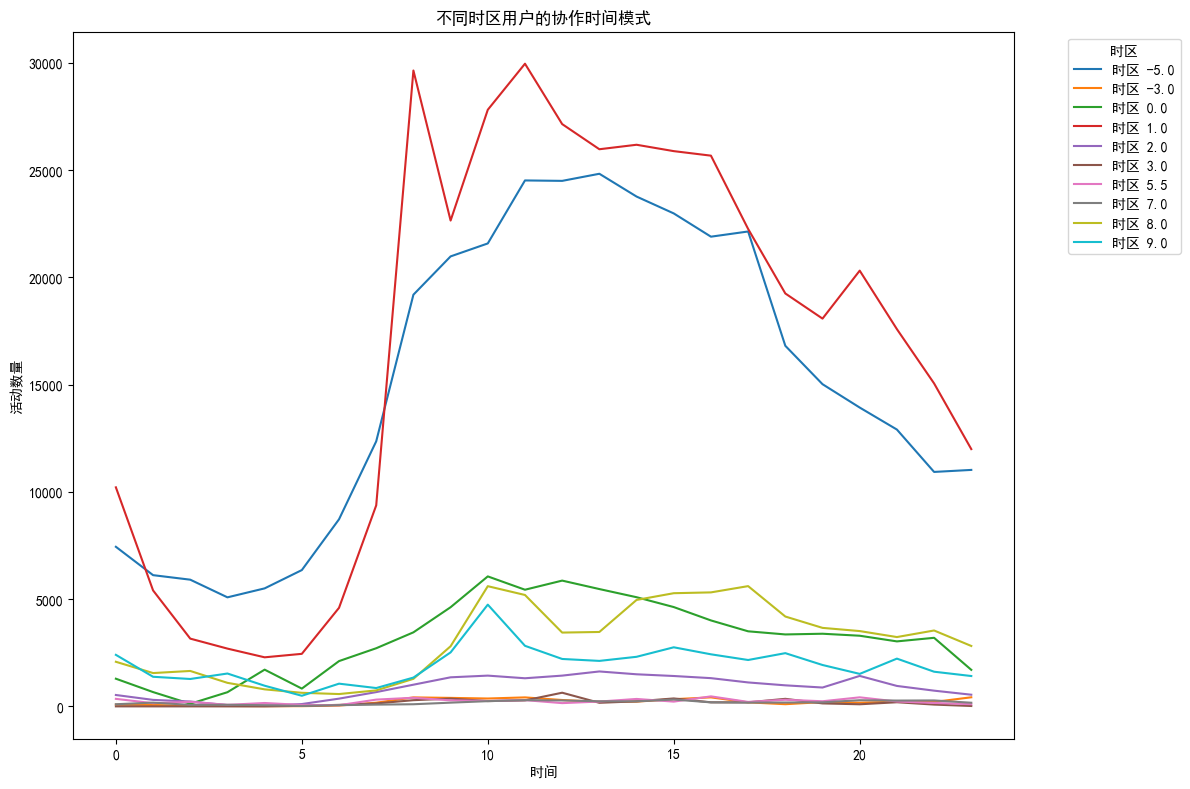

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv('users_combined_info_500.csv')

# 国家到时区的映射表
country_to_timezone = {
    "United States": -5,  # Eastern Time (ET)
    "United Kingdom": 0,  # Greenwich Mean Time (GMT)
    "Slovakia": 1,        # Central European Time (CET)
    "Japan": 9,           # Japan Standard Time (JST)
    "Spain": 1,           # Central European Time (CET)
    "Germany": 1,         # Central European Time (CET)
    "Italy": 1,           # Central European Time (CET)
    "Brazil": -3,         # Brasília Time (BRT)
    "Hungary": 1,         # Central European Time (CET)
    "India": 5.5,         # Indian Standard Time (IST)
    "Finland": 2,         # Eastern European Time (EET)
    "Sweden": 1,          # Central European Time (CET)
    "Canada": -5,         # Eastern Time (ET)
    "Netherlands": 1,     # Central European Time (CET)
    "China": 8,           # China Standard Time (CST)
    "Ireland": 0,         # Greenwich Mean Time (GMT)
    "Lithuania": 2,       # Eastern European Time (EET)
    "France": 1,          # Central European Time (CET)
    "Poland": 1,          # Central European Time (CET)
    "Austria": 1,         # Central European Time (CET)
    "Estonia": 2,         # Eastern European Time (EET)
    "Croatia": 1,         # Central European Time (CET)
    "Denmark": 1,         # Central European Time (CET)
    "Belgium": 1,         # Central European Time (CET)
    "Luxembourg": 1,      # Central European Time (CET)
    "Portugal": 0,        # Western European Time (WET)
    "Greece": 2,          # Eastern European Time (EET)
    "Russia": 3,          # Moscow Time (MSK)
    "Indonesia": 7,       # Western Indonesia Time (WIB)
    "Romania": 2,         # Eastern European Time (EET)
    "Cyprus": 2,          # Eastern European Time (EET)
    "Bulgaria": 2,        # Eastern European Time (EET)
    "Slovenia": 1,        # Central European Time (CET)
    "Latvia": 2,          # Eastern European Time (EET)
    "Malta": 1            # Central European Time (CET)
}

# 根据 country 列判断时区
df['timezone'] = df['country'].map(country_to_timezone)

# 将 event_time 列转换为 datetime 对象
df['event_time'] = pd.to_datetime(df['event_time'])

# 定义一个函数来计算当地时间
def get_local_time(row):
    if pd.isnull(row['timezone']):
        return None
    utc_offset = pd.Timedelta(hours=row['timezone'])
    return row['event_time'] + utc_offset

# 计算每个用户的当地时间
df['local_time'] = df.apply(get_local_time, axis=1)

# 提取小时信息
df['local_hour'] = df['local_time'].dt.hour

# 按时区和小时统计用户活动
activity_pattern = df.groupby(['timezone', 'local_hour']).size().unstack().fillna(0)

# 打印不同时区用户的活跃时间习惯
print("不同时区用户的活跃时间习惯：")
print(activity_pattern)

# 绘制不同时区用户的协作时间模式图
plt.figure(figsize=(12, 8))
for timezone in activity_pattern.index:
    plt.plot(activity_pattern.columns, activity_pattern.loc[timezone], label=f'时区 {timezone}')

plt.title('不同时区用户的协作时间模式')
plt.xlabel('时间')
plt.ylabel('活动数量')
plt.legend(title='时区', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

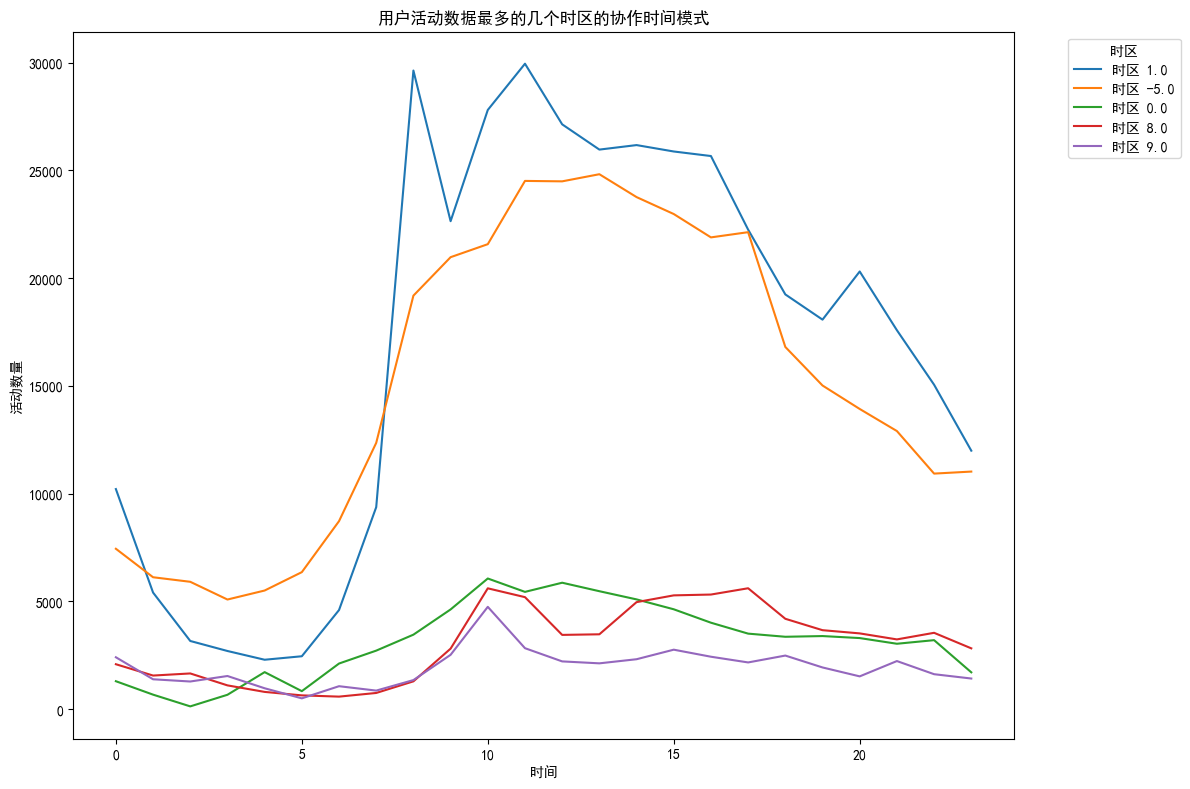

In [9]:
# 找出用户活动数据最多的几个时区
most_active_timezones = activity_pattern.sum(axis=1).nlargest(5).index

# 绘制用户活动数据最多的几个时区的协作时间模式图
plt.figure(figsize=(12, 8))
for timezone in most_active_timezones:
    plt.plot(activity_pattern.columns, activity_pattern.loc[timezone], label=f'时区 {timezone}')

plt.title('用户活动数据最多的几个时区的协作时间模式')
plt.xlabel('时间')
plt.ylabel('活动数量')
plt.legend(title='时区', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

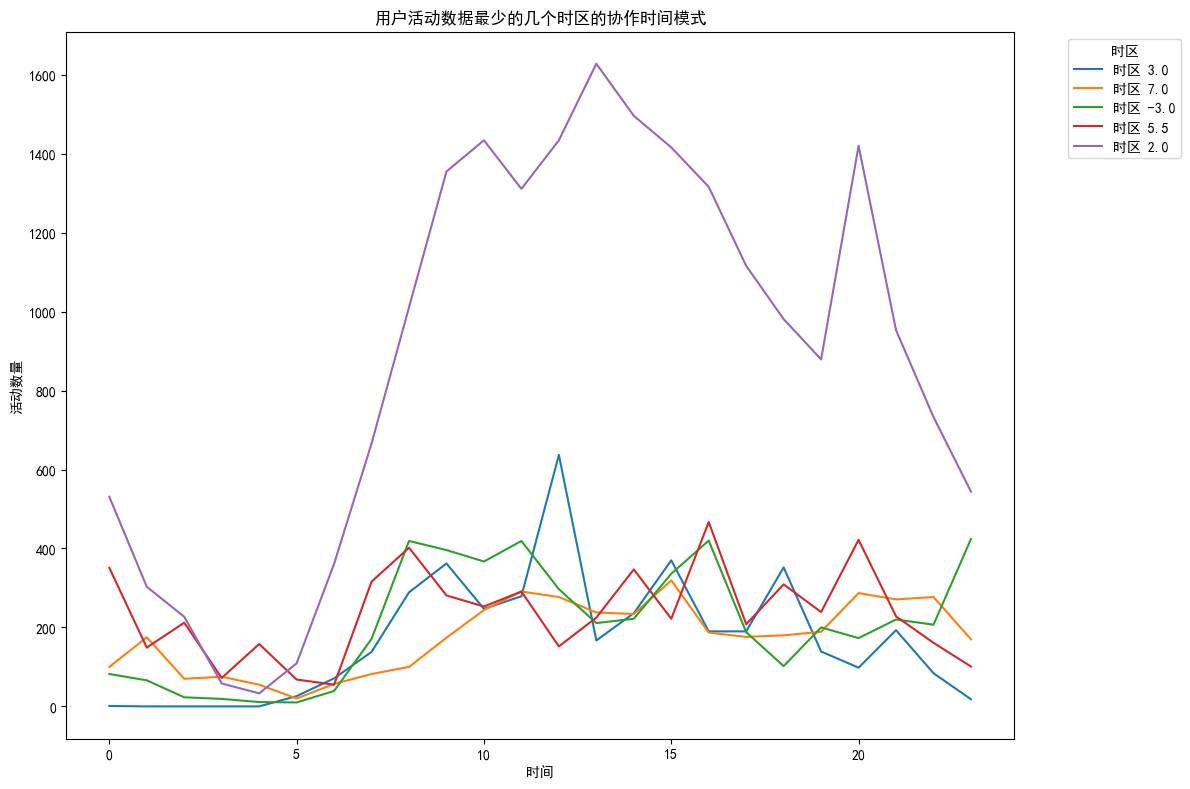

In [8]:
# 找出用户活动数据最少的几个时区
least_active_timezones = activity_pattern.sum(axis=1).nsmallest(5).index

# 绘制用户活动数据最少的几个时区的协作时间模式图
plt.figure(figsize=(12, 8))
for timezone in least_active_timezones:
    plt.plot(activity_pattern.columns, activity_pattern.loc[timezone], label=f'时区 {timezone}')

plt.title('用户活动数据最少的几个时区的协作时间模式')
plt.xlabel('时间')
plt.ylabel('活动数量')
plt.legend(title='时区', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

2.协作行为分析

- 提交频率：统计每个用户的提交次数，识别高活跃用户和低活跃用户。

提交次数最多的前 10 个用户：
name
arlac77               37960
MilosKozak            36400
danielroe             30616
chenrui333            20300
ConfluentSemaphore    19215
taiki-e               14505
khipp                 12905
bot-targa             12704
frenck                11218
bdraco                10764
Name: count, dtype: int64
提交次数最少的前 10 个用户：
name
lvhan028           750
innerdvations      743
cirospaciari       650
zhangdaiscott      644
meeseeksmachine    635
Court72            621
brophdawg11        599
javsalgar          582
Electroid          485
tmcconechy          75
Name: count, dtype: int64
提交次数的平均数：2605.1830985915494
高活跃用户数量：142
低活跃用户数量：355


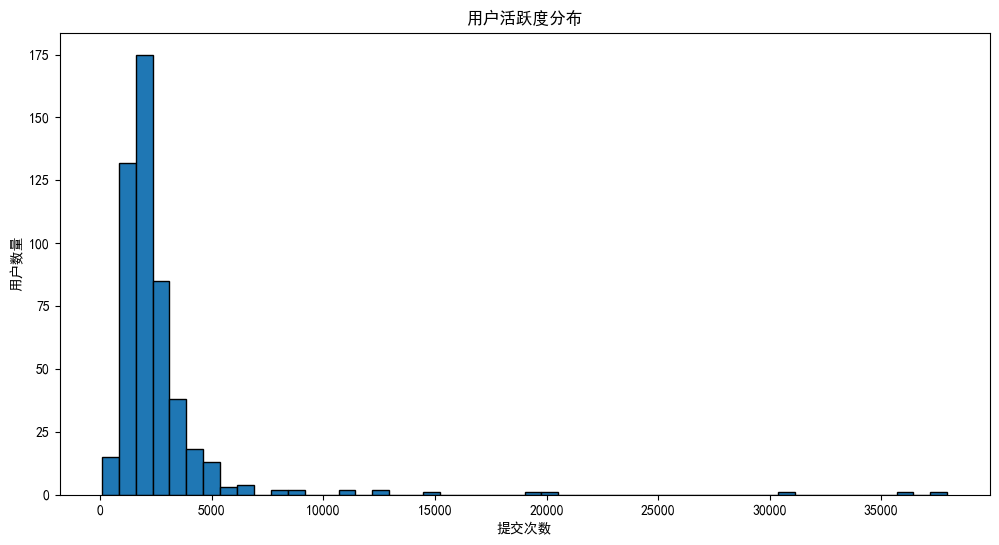

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
df = pd.read_csv('users_combined_info_500.csv')

# 统计每个用户的提交次数
user_activity = df['name'].value_counts()

# 打印提交次数最多的前 10 个用户
print("提交次数最多的前 10 个用户：")
print(user_activity.head(10))

# 打印提交次数最少的前 10 个用户
print("提交次数最少的前 10 个用户：")
print(user_activity.tail(10))

# 计算提交次数的平均数
mean_activity = user_activity.mean()
print(f"提交次数的平均数：{mean_activity}")

# 根据平均数设定高活跃用户和低活跃用户的阈值
high_activity_threshold = mean_activity

# 识别高活跃用户和低活跃用户
high_activity_users = user_activity[user_activity >= high_activity_threshold]
low_activity_users = user_activity[user_activity < high_activity_threshold]

print(f"高活跃用户数量：{len(high_activity_users)}")
print(f"低活跃用户数量：{len(low_activity_users)}")

# 绘制用户活跃度分布图
plt.figure(figsize=(12, 6))
user_activity.plot(kind='hist', bins=50, edgecolor='black')
plt.title('用户活跃度分布')
plt.xlabel('提交次数')
plt.ylabel('用户数量')
plt.show()

3.用户的事件动作

- 分析不同事件动作的用户活跃度，识别哪些事件动作更频繁。

提交次数最多的前 10 个事件动作：
event_action
added        617218
created      411961
closed       173489
opened        76406
published      9455
started        3809
reopened       2438
Name: count, dtype: int64


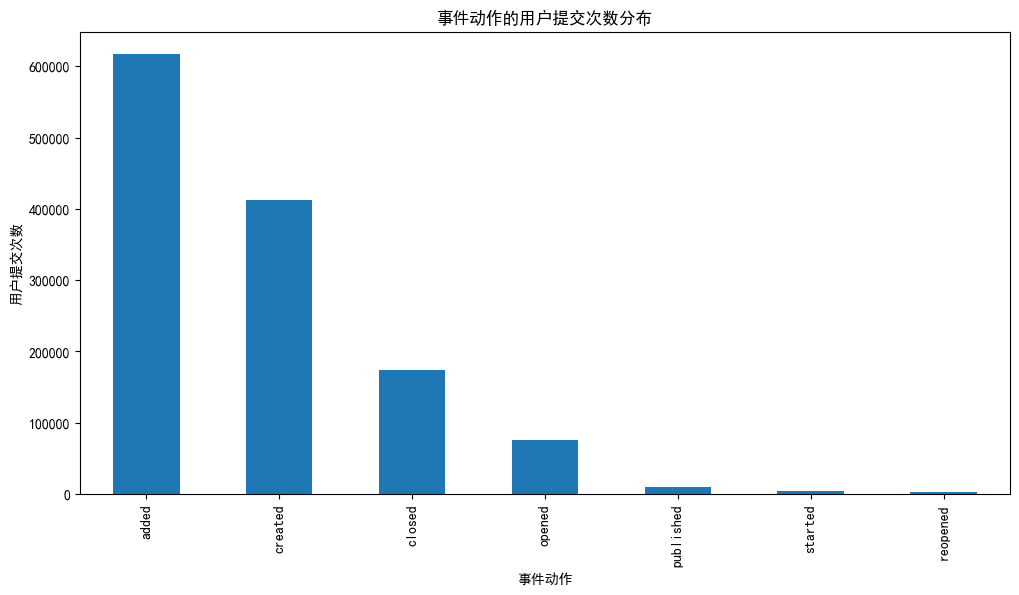

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取 CSV 文件
df = pd.read_csv('users_combined_info_500.csv')

# 统计每个事件动作的用户提交次数
event_action_activity = df['event_action'].value_counts()

# 打印提交次数最多的前 10 个事件动作
print("提交次数最多的前 10 个事件动作：")
print(event_action_activity.head(10))

# 绘制事件动作的分布图
plt.figure(figsize=(12, 6))
event_action_activity.plot(kind='bar')
plt.title('事件动作的用户提交次数分布')
plt.xlabel('事件动作')
plt.ylabel('用户提交次数')
plt.show()

4.高影响力用户的国家和地区分布

- 分析高影响力的用户分布在哪些国家和地区

影响力的平均数：483.06665480400716
高影响力用户的国家分布：
country
United States           37
Germany                 21
China                   12
France                   9
Canada                   8
Netherlands              6
United Kingdom           6
Poland                   5
Switzerland              5
Japan                    4
Italy                    3
Denmark                  2
Australia                2
Austria                  2
Finland                  2
Czechia                  1
Hong Kong                1
Taiwan                   1
Indonesia                1
Hungary                  1
Egypt                    1
Malaysia                 1
Belgium                  1
United Arab Emirates     1
Colombia                 1
Bulgaria                 1
Sweden                   1
New Zealand              1
South Korea              1
Spain                    1
Ecuador                  1
India                    1
Lebanon                  1
Name: count, dtype: int64


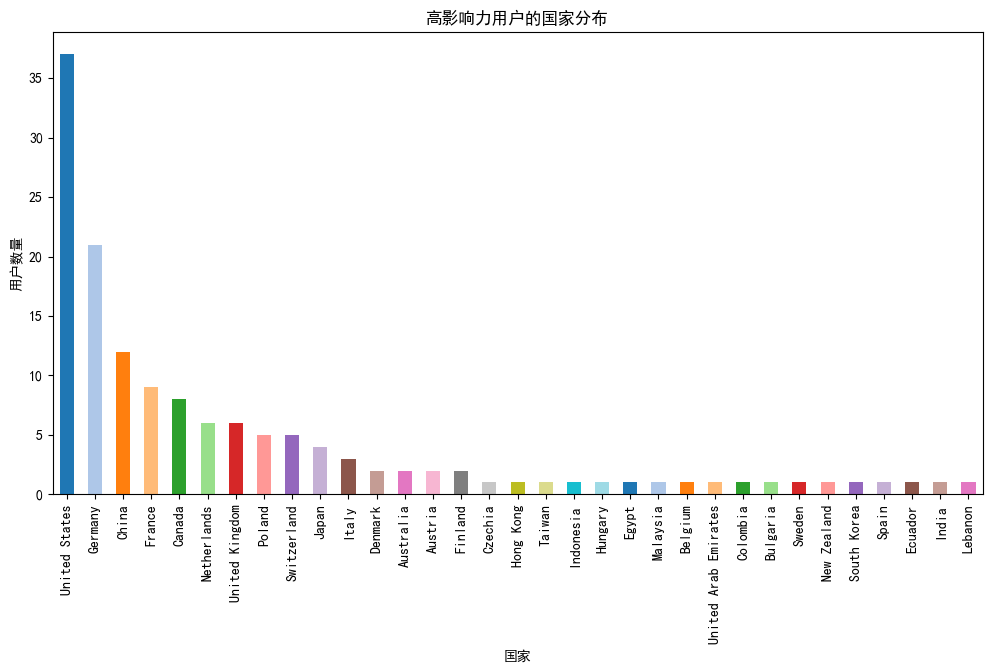

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# 按 name 列排序并去重，保留每个人的第一条记录
df_sorted = df.sort_values(by=['name', 'event_time']).drop_duplicates(subset='name', keep='first')

# 计算 total_influence 的平均数
mean_influence = df_sorted['total_influence'].mean()
print(f"影响力的平均数：{mean_influence}")

# 根据平均数设定高影响力用户的阈值
high_influence_threshold = mean_influence

# 识别高影响力用户
high_influence_users = df_sorted[df_sorted['total_influence'] >= high_influence_threshold]

# 统计高影响力用户所在的国家分布
high_influence_country_distribution = high_influence_users['country'].value_counts()

# 打印高影响力用户的国家分布
print("高影响力用户的国家分布：")
print(high_influence_country_distribution)

colors = plt.cm.tab20.colors
# 绘制高影响力用户的国家分布图
plt.figure(figsize=(12, 6))
high_influence_country_distribution.plot(kind='bar',color=colors)
plt.title('高影响力用户的国家分布')
plt.xlabel('国家')
plt.ylabel('用户数量')
plt.show()

- 比较最有影响力的十个国家和用户分布最多的十个国家排名是否相同

In [8]:
# 获取最有影响力的十个国家和用户分布最多的十个国家
top_10_high_influence_countries = high_influence_country_distribution.head(10).index
top_10_all_users_countries = country_distribution.head(10).index

print(f"最有影响力的十个国家：{list(top_10_high_influence_countries)}")
print(f"用户分布最多的十个国家：{list(top_10_all_users_countries)}")

# 比较最有影响力的十个国家与用户分布最多的十个国家是否相同
if set(top_10_high_influence_countries) == set(top_10_all_users_countries):
    print("最有影响力的十个国家与用户分布最多的十个国家排名相同。")
else:
    print("最有影响力的十个国家与用户分布最多的十个国家排名不同。")

最有影响力的十个国家：['United States', 'Germany', 'China', 'France', 'Canada', 'Netherlands', 'United Kingdom', 'Poland', 'Switzerland', 'Japan']
用户分布最多的十个国家：['United States', 'Germany', 'China', 'Canada', 'France', 'United Kingdom', 'Netherlands', 'Australia', 'Switzerland', 'Japan']
最有影响力的十个国家与用户分布最多的十个国家排名不同。


In [9]:
# 比较最有影响力的十个国家与用户分布最多的十个国家是否相同
if set(top_10_high_influence_countries) == set(top_10_all_users_countries):
    comparison_result = "最有影响力的十个国家与用户分布最多的十个国家排名相同。"
else:
    comparison_result = "最有影响力的十个国家与用户分布最多的十个国家排名不同。"

print(comparison_result)
# 将两个列表写入一个文本文件中
with open('country_comparison.txt', 'w', encoding='utf-8') as f:
    f.write(f"最有影响力的十个国家：{list(top_10_high_influence_countries)}\n")
    f.write(f"用户分布最多的十个国家：{list(top_10_all_users_countries)}\n")
    f.write(comparison_result)

print("结果已写入 country_comparison.txt 文件中。")

最有影响力的十个国家与用户分布最多的十个国家排名不同。
结果已写入 country_comparison.txt 文件中。
